<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Sistema_Linear_Minimiza%C3%A7%C3%A3o_de_Gradientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Métodos de Solução de Sistemas Linerares Baseados em Minimização de Gradiente

Considere o Sistema Linear formado pelas equações:


   $3x_{1}+2x_{2}=2$ \\
   $ 2x_{1}+6x_{2}=-8$

Graficamente, podemos representar sua solução pelo *ponto de intercecção *das retas que as representam. Basta que para isto, isolemos uma das variáveis em nas equações, ou seja, devemos EXPLICITAR uma variável para poder a calcular em função da outra.* (observação: nem sempre isto é possível em equações não lineares)

O Bloco de Código abaixo ilustra o sistema:

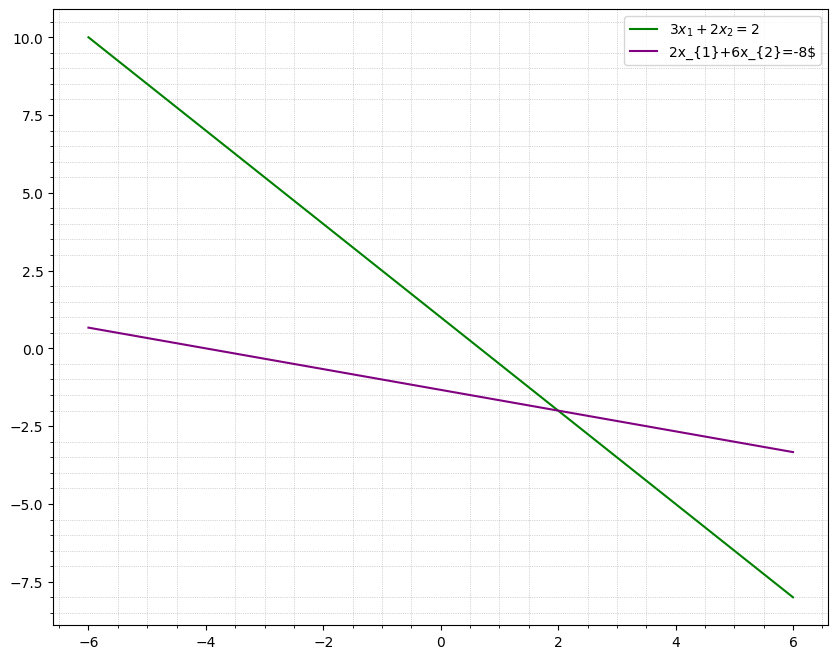

In [1]:
#Representação Gráfica do Sistema Linear

#biliotecas necesárias:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo as equações das retas
x1_vals = np.linspace(-6, 6, 100)  # Valores de x1 para plotar as retas
x2_1 = (2 - 3*x1_vals) / 2  # Para a equação 3x1 + 2x2 = 2
x2_2 = (-8 - 2*x1_vals) / 6  # Para a equação 2x1 + 6x2 = -8

# Plotando as retas

fig = plt.figure(figsize=(10, 8)) #  tamanho da figura
plt.plot(x1_vals, x2_1, label='$3x_{1}+2x_{2}=2$ ', color='green')  #reta 1 (label em LATEX)
plt.plot(x1_vals, x2_2, label='2x_{1}+6x_{2}=-8$', color='purple')  #reta 2 (label em LATEX)

# Adicionando uma legenda
plt.legend()
# Adicionando grade para melhor vizualização
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5)
plt.show()

Por inspeção gráfica , asolução do sistema se encontra no ponto $[2,-2]$, o que pode ser facilmente encontrado por susbtituição.
Outra forma de representrar o sistema de equações é em sua forma matricial:

$
\left[\begin{array}{cc}
3 & 2\\
2 & 6
\end{array}\right]\cdot\left[\begin{array}{c}
x_{1}\\
x_{2}
\end{array}\right]=\left[\begin{array}{c}
2\\
-8
\end{array}\right
]$,

ou simplemente,

 $\mathbf{A\cdot}\mathbf{x}=\mathbf{b}$,

Cuja solução pode ser obtida por um método direto ou iterativo. Como m
etodos diretos podemos usar Eliminação Gaussiana ou Decomposição LU, por exemplo. Estes métodos tornaam a matriz cheia em uma matriz diagonal superior e resolvem o sistema por ubstituição reversa. São indicados para matrizes pouco esparsas (com poucos zeros em seus coeficientes).

Já na abordagem iterativa podemos usar diversos métodos, entre eles os que se baseiam em minimização de gradiente. Estes métodos são indicados para matrizes esparsas - o que é o caso de problemas de Fluidodiânmica Computacional (CFD).

Para entender seus fundamentos, vejamos primeiramente o que denominamos de Forma Quadrática do Sistema, ou apenas o Funcional do Sistema

# Forma Quadrática do Sistema

Para todo e quelquer sistema linear escrito na forma matricial
 $\mathbf{A\cdot}\mathbf{x}=\mathbf{b}$, podemos escrever um funcional quadrático do sistema:

 $f\left(\mathbf{x}\right)=\frac{1}{2}\mathbf{x}^{T}\cdot\mathbf{A}\cdot\mathbf{x}-\mathbf{b}\cdot\mathbf{x}+\mathbf{c}$.

 em que $\mathbf{x}$ é o vetor que contém todas as variáveis do sistema $\mathbf{x}=\left[x_{1},x_{2},\ldots, x_{n}\right]$. Assim, a dimensão desta "parábola" é $n+1$, onde $n$ é o número de variáveis do sistema, ou graus de liberdade.
 Cabe dizer aqui, que, para este contexto, as linhas da matriz são todas *Lineramente Independentes,* e nosso sistema está fechado ($\text{rank}(\mathbf{A})=n)$

 O rank de uma matriz é o número de linhas linearmente independentes. Em sistemas bem postos e fechados, o número de linhas e colunas é igual ao número de variáveis, que por sua vez é igual ao rank da matriz, portanto, temos $n$ equações independentes em uma matriz quadrada $n\times n$.  

 Para o nosso exmplo temos uma matriz $2 \times 2$, para duas variáveis $x_{1}$ e $x_{2}$. Logo, a forma quadrática do sistema resultará em um parabolóide no espaço $\mathbb{R}^{3}$. Sendo assim possível termos uma representação gráfica em três dimensões de fácil vizualização.

 Desta forma, montemos o funcional e vehjamos a sua forma em uma gráfico 3D. Considera-se aqui que o vetor $\mathbf{c}=0$, ou seja:



 $f\left(\mathbf{x}\right)=\frac{1}{2}\mathbf{x}^{T}\cdot\mathbf{A}\cdot\mathbf{x}-\mathbf{b}\cdot\mathbf{x}$.


 Abaixo, temos o código para esta vizualização:

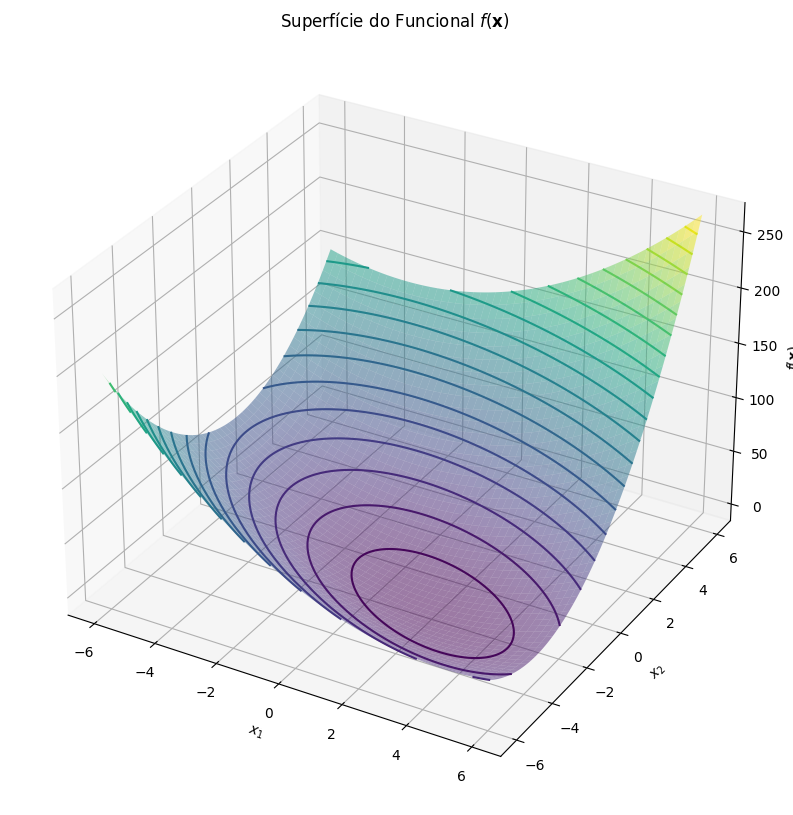

In [2]:
# Definindo a matriz A e o vetor b
A = np.array([[3, 2], [2, 6]]) # Matrix
b = np.array([2, -8])          # Vetor

# Definindo o funcional f(x)
# Por simplicidade, evitou-se o uso de funções de multiplicação Matriz Vetor
def f(x1, x2):
    term1 = 0.5 * (A[0,0] * x1**2 + (A[0,1] + A[1,0]) * x1 * x2 + A[1,1] * x2**2)
    term2 = b[0] * x1 + b[1] * x2
    return term1 - term2

# Criando a grade de valores para x1 e x2
x1 = np.linspace(-6, 6, 400)
x2 = np.linspace(-6, 6, 400)
# Grade da superfície
X1, X2 = np.meshgrid(x1, x2)

# Calculando f(x) para cada par (x1, x2)
F = f(X1, X2)

# Plotando a superfície
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis', alpha =0.5)

#curvas de nível em 3D
contour_levels = np.linspace(0, np.max(F), 20)
ax.contour3D(X1, X2, F, levels=contour_levels, cmap='viridis')

# Adicionando rótulos
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$f(\mathbf{x})$')
ax.set_title('Superfície do Funcional $f(\mathbf{x})$')

plt.show()


Temos na figura a superfície que representa todo o campo de $f(\mathbf{x})$. Note que o parabolóide é um tando distorcido. Compare com o parabolóide da função  

$z = \frac{1}{2}(x^2 + y^2)$

Que, matricialmente, equivalae a

$
\left[\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right]\cdot\left[\begin{array}{c}
x_{1}\\
x_{2}
\end{array}\right]=\left[\begin{array}{c}
0\\
0
\end{array}\right
]$,

Cujo funcional quadrático gera a função $z$
Sua figura é mostrada abaixo:

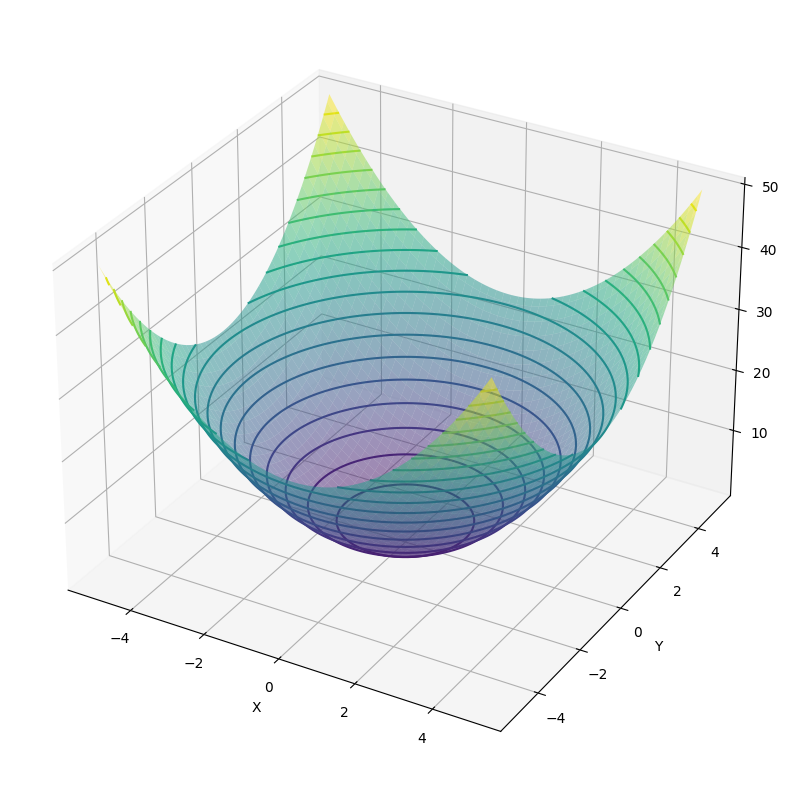

In [3]:
# Parabolóide simetrico

# Define o tamanho da grade
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define a função do paraboloide
z = x**2 + y**2

# Cria a figura e o eixo 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plota o paraboloide
ax.plot_surface(x, y, z, cmap='viridis',alpha = 0.5)

#curvas de nível em 3D
contour_levels = np.linspace(0, np.max(z), 20)
ax.contour3D(x, y, z, levels=contour_levels, cmap='viridis')

# Adiciona rótulos aos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostra o gráfico
plt.show()

Esta simetria está associada à natureza da Matriz. No nosso sistema, os coeficientes da diagonal principal tem "pesos" diferentes, enquanto neste, os coeficientes tem o mesmo valor. O assunto é mais profundo, mas por ora basta saber que isto está associado aos autovalores e autovetores destas duas matrizes que causam esta distorção.

Calculemos, pois, os autovalores e autovelores de ambas as matrizes:

In [4]:
# Define as matrizes
I = np.array([[1, 0], [0, 1]])
#A = np.array([[3, 2], [2, 6]])

# Calcula os autovalores e autovetores
eigvals_I, eigvecs_I = np.linalg.eig(I)
eigvals_A, eigvecs_A = np.linalg.eig(A)

# Exibe os resultados
print("Matriz I:")
print("Autovalores:", eigvals_I)
print("Autovetores:\n", eigvecs_I)

print("\nMatriz A:")
print("Autovalores:", eigvals_A)
print("Autovetores:\n", eigvecs_A)

Matriz I:
Autovalores: [1. 1.]
Autovetores:
 [[1. 0.]
 [0. 1.]]

Matriz A:
Autovalores: [2. 7.]
Autovetores:
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


Note que na função $z$ todos os valores são unitários, incluindo os autovetores, enquanto ado nosso sistema possui valores distintos que "puxam"  distorcem a superfície.

Portanto, a natureza da matriz afeta a CURVATURA da siperfície do funcional do sistema, e esta característica é de funamental importância para o que estamos a discutir.

# Curvas de Nivel ou Mapa de Contorno

Vejamos então o campo 2D do nosso funcional.  A assimetria do campo será mais evidente:

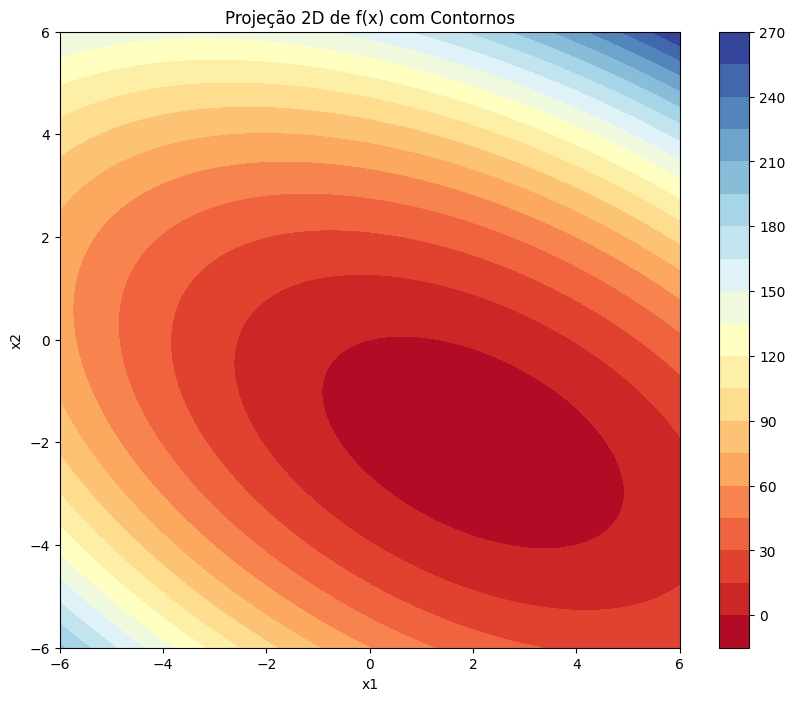

In [5]:
# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando rótulos
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos')

plt.show()

Observe que as curvas são elipses, e a curvatura é evidenciada pela largura de cada transição. Quanto mais estreitas, mais variação, ou mais íngríme a superfície, e quanto mais espaçadas, mais suave e plana a superfície. Ou seja, as curvaturas, ou as derivadas de $f\left(\mathbf{x}\right)$ transiciona de avlores altos (bordas do gráfico) para valores suaves à medida que a posição no campo se aproxima de $[2,-2]$.

Neste ponto as derivadas de $f\left(\mathbf{x}\right)$ são nulas, e como nossa paráboloa está voltada para cima ( A Matriz é Positiva Definida - assunto paa outra oportunidade), **este ponto é onde o funcional tem seu valor mínimo e as derivadas dele são nulas, ou seja, é um ponto de mínimo desta função.**

# Minimização do Gradiente de $f\left(\mathbf{x}\right)$

Acabos de perceber que o ponto de mínimo e a solução do sistema são iguais, ou pelo menos estão relacionados de alguma maneira.

O gradiente de uma função escalas é o vetor de derivadas desta função que indica a direção da máxima variação desta função, ou seja, ele aponta para onde a função varia mais rapidamente em determinado ponto.

No ponto de mínimo, as derivadas da função são nulas, e asim também o seu gradiente:


$f\left(\mathbf{x}\right)=\frac{1}{2}\mathbf{x}^{T}\cdot\mathbf{A}\cdot\mathbf{x}-\mathbf{b}\cdot\mathbf{x}+\mathbf{c}$.
 e seu gradiente:

$\nabla f=\mathbf{A\cdot}\mathbf{x}-\mathbf{b}$

Perceba que o lado direto da igualdade é o próprio sistema linear, e quando $\mathbf{x}$ for igual a  solução do sistema, o valor de  $ \mathbf{A\cdot}\mathbf{x}-\mathbf{b}$  será igual a zero.

Assim, resolver o sistema linear equivale a encontrar o ponto onde o $\nabla f$ é nulo! Portanto, na solução:

$\nabla f=\mathbf{A\cdot}\mathbf{x}-\mathbf{b}=0$

Caso este ponto seja um ponto de mínimo, minimizar a função equivale a resolver o sistema linear. O mesmo pode se dizer se for um ponto de máximo, e neste caso, maximizar a função é também equivalente a resolvier om sistema linear. Esta é o fundamento dos métodos de otimização baseados em gradientes e dos métodos de solução de sistema linear baseado em minimização de gradiente.

Vamos verificar estas conclusões
Até então fizemos apenas uma inspeção visual das retas, e foi dito que a solução era $[2,-2]$ e que poderia ser inspecionado resolvendo por substituição. Resolvamos então o sistema de foram matricial e plotemos este ponto que representa a sua solução:

In [16]:
# Resolvendo o sistema linear

# Encontrando o ponto de mínimo resolvendo o sistema linear A * x = b
x_min = np.linalg.solve(A, b)

print("A soluçao é:", x_min)

A soluçao é: [ 2. -2.]


Verificamos então o valor do gradiente neste ponto:

In [7]:
#Verificando que a solução é o ponto mínimo do funcional f(x):

# Verificando se o gradiente é zero no ponto de mínimo
gradient = np.dot(A, x_min) - b
print("Gradiente no ponto de mínimo:", gradient)

Gradiente no ponto de mínimo: [0. 0.]


Como discutido, ele é nulo, suas componentes valem zero, e portanto o vetor gradoiente tem norma igual a zero.

Plotemos então a soluçõa e as curvas de nível:

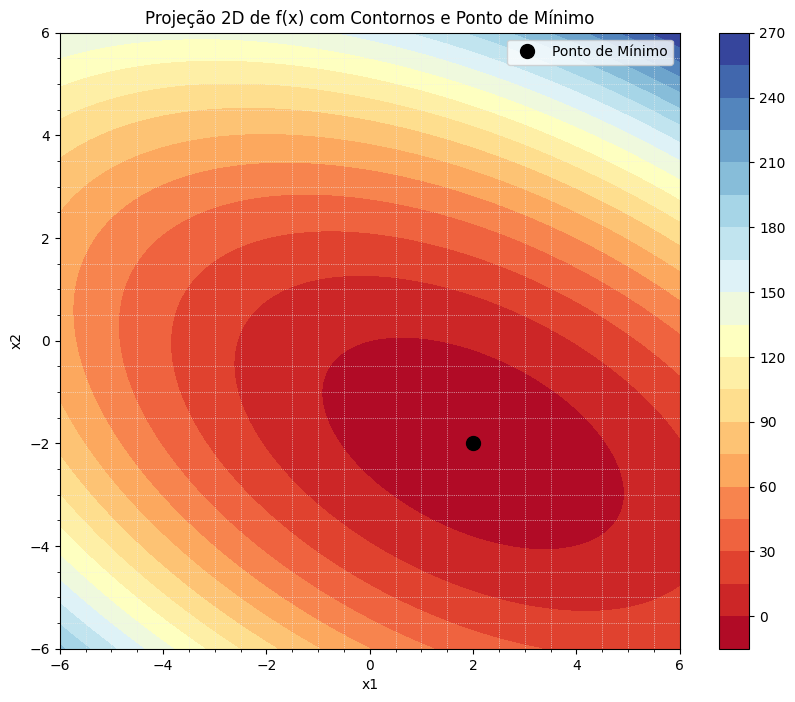

In [8]:
#Idenfificando graficamente:

# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos e Ponto de Mínimo')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)


plt.show()

O ponto encontra-se na região onde $\nabla f = 0$. Veamos então como o campo dos vetor gradiente se comporta:

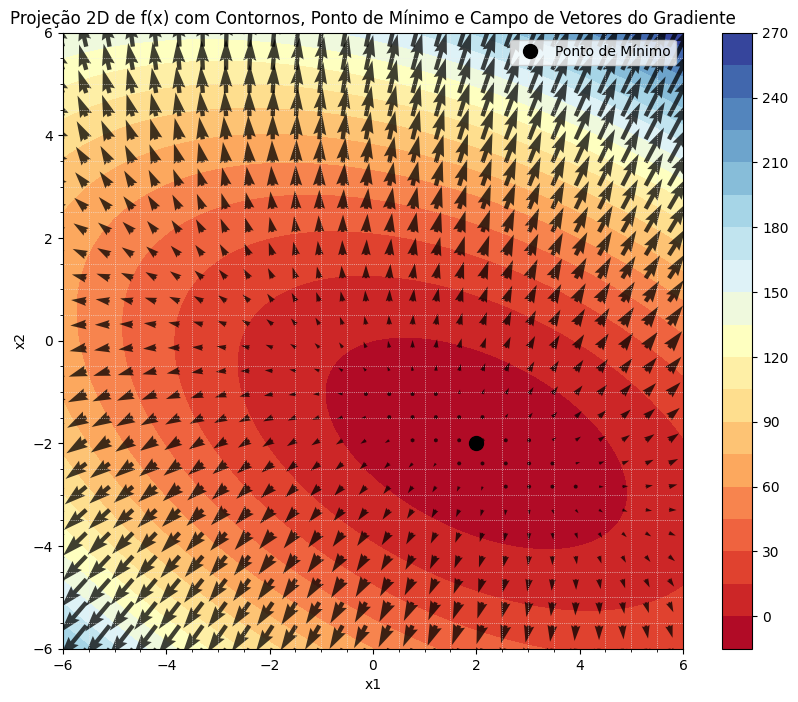

In [17]:
#Adicionando campo gradiente ao gráfico

# Calculando o gradiente de f(x) em cada ponto da grade
grad_f_x1 = A[0,0] * X1 + A[0,1] * X2 - b[0]
grad_f_x2 = A[1,0] * X1 + A[1,1] * X2 - b[1]

# Subamostrando a grade para reduzir a densidade dos vetores
skip = 15 # Pula de 10 em 10
X1_sub = X1[::skip, ::skip]
X2_sub = X2[::skip, ::skip]
grad_f_x1_sub = grad_f_x1[::skip, ::skip]
grad_f_x2_sub = grad_f_x2[::skip, ::skip]

# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando o campo de vetores do gradiente
plt.quiver(X1_sub, X2_sub, grad_f_x1_sub, grad_f_x2_sub, color='black', alpha=0.75, scale=700,width=0.007)

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos, Ponto de Mínimo e Campo de Vetores do Gradiente')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.show()

Como visto na figura, o "tamanho" (sua norma) do vetor diminui à medida que ficamos próximos da soluação (o círculo preto). A norma do vetor gradiente també esta associada à curvatura da suprfíce do funcional que é nula na solução $[2,-2]$.


E esta percepção nos permite afirmar que:

---

> # "Seguir na direção oposta do vetor gradiente nos leva à solução do sitema linear"


---
Vamos confirmar esta hipótese plotando o campo de $-\nabla f$ e ver se ele converge para a solução:

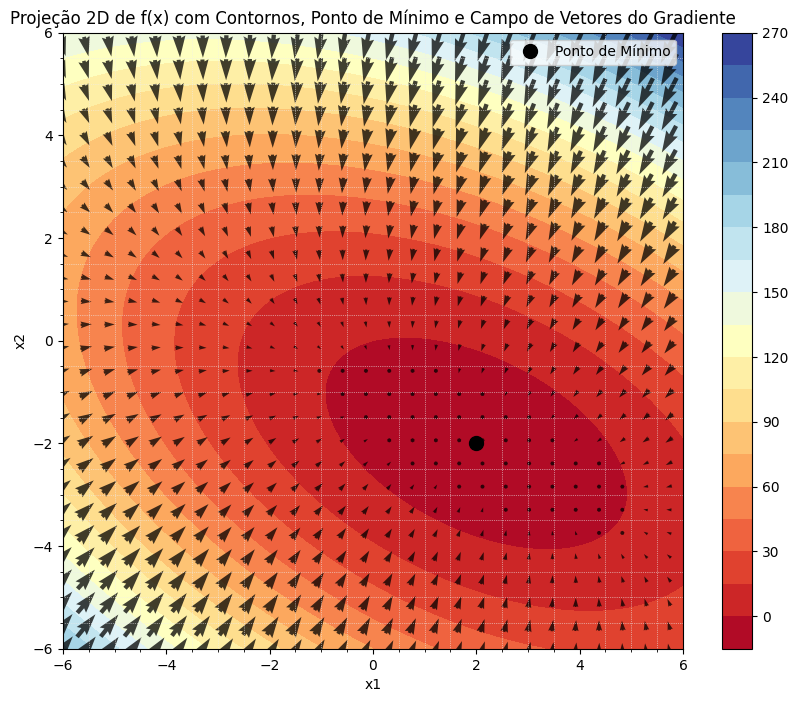

In [10]:
#O mesmo mas agora seguindo a direção oposta a dada por Grad(f) - a direção de minimização (ou maximização)

#Adicionando campo gradiente ao gráfico

# Calculando o gradiente de f(x) em cada ponto da grade
grad_f_x1 = A[0,0] * X1 + A[0,1] * X2 - b[0]
grad_f_x2 = A[1,0] * X1 + A[1,1] * X2 - b[1]

# Subamostrando a grade para reduzir a densidade dos vetores
skip = 15 # Pula de 10 em 10
X1_sub = X1[::skip, ::skip]
X2_sub = X2[::skip, ::skip]
grad_f_x1_sub = -grad_f_x1[::skip, ::skip]  #mudando o sinal das componentes (+)->(-)
grad_f_x2_sub = -grad_f_x2[::skip, ::skip]

# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando o campo de vetores do gradiente
plt.quiver(X1_sub, X2_sub, grad_f_x1_sub, grad_f_x2_sub, color='black', alpha=0.75, scale=1000,width=0.007,pivot='mid')

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos, Ponto de Mínimo e Campo de Vetores do Gradiente')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.show()

Os vetores gradiente apontam na direção do círiculo preto que demarca a solução do sistema.

Vejamos em mais detalhes:

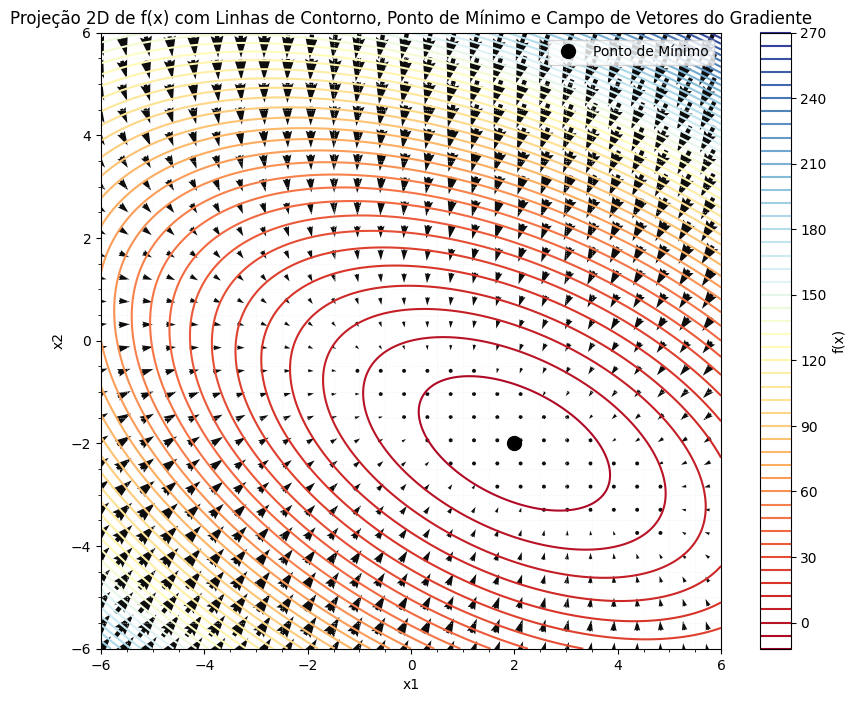

In [11]:
# Plotando a projeção 2D com linhas de contorno coloridas
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(X1, X2, F, levels=51, cmap='RdYlBu')
plt.colorbar(contour, ax=ax, label='f(x)')


# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando o campo de vetores do gradiente com vetores mais espessos
plt.quiver(X1_sub, X2_sub, grad_f_x1_sub, grad_f_x2_sub, color='black', alpha=0.95, scale=1000, width=0.007,pivot='mid')

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Linhas de Contorno, Ponto de Mínimo e Campo de Vetores do Gradiente')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

Perceba que todos os vetores são normais as isolinhas de $f$. SObre a isolinha não há variações. LOgo seguir na direção tangente a uma isolinha não nos permite achar a solução e, dependendo da topologia do funcional, pode mesmo nos afastar dela.

Temos então dois extremos:


*   seguir contra o gradiente nos leva à solução;
*   seguir na direção perpendicular ao gradiente nos afasta e pode memso impedir de encontrar a solução;

Assim, podemos criar um método que siga a direção do gradiente a aprtir de um ponto dado até que este atinja a solução no mínimo da função e/ou de seu gradiente.

Esta forma de calcular é iterativa, pois parte de uma estimativa inicial e evolui a cada iteração.

Toods os métodos que se valem desta tática são métodos de minimização de gradiente

O primeiro e meia simples é "Método da Inclinação mais Íngrime", ou Steepest Descent.

# Método Steepest Descent

A forma mais básica dele é a seguinte:
---

##  "A partir de um ponto inicial, avançe na direção do gradiente da função"

---

Matematicamente:


$\mathbf{x}^{k+1} = \mathbf{x}^{k} - \alpha \nabla f$

onde $\alpha$ é um parâmetro de avanço que acelera ou reatarda o avanço da solução


Como se trata de um método iterativo, é necessário um critério de parada, uma tolerância, ou seja quando $ \nabla f< \epsilon$ interromp-se o cálculo. Caso contrário, o método tende a se aproximar assintoticamente da solução, e neste ponto $ \nabla f$ é muito pequeno e $\mathbf{x}^{k+1} \approx \mathbf{x}^{k}$ , e o *solver* vai estagnar  sem gnahos significativos no valor da solução.

Vejamos então esta abordagem em ação:

In [19]:
# Método Steepest Descent

# Ponto inicial
x0 = np.array([-6, 6])

Número total de iterações: 836
A solução encontrada é :
[ 1.99999956 -1.99999978]
A norma L2 do erro é:
9.9255713220525e-07


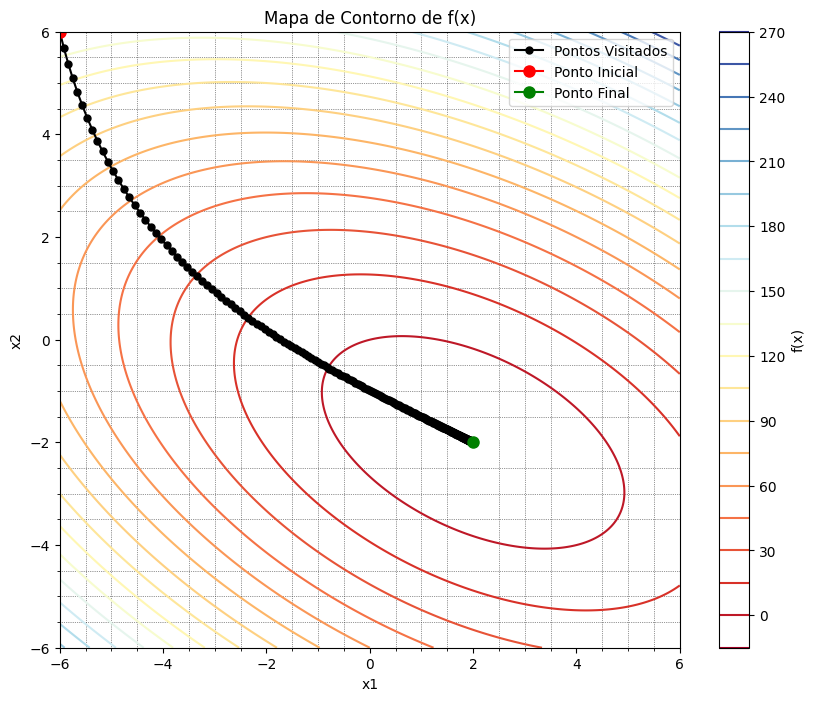

In [20]:
def steepest_descent(A, b, x0, alpha=0.01, tol=1e-6, max_iter=1000):
    x = x0.copy()  # Ponto inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    for i in range(max_iter):
        # Gradiente da função objetivo
        gradient = np.dot(A, x) - b

        # Critério de parada: norma do gradiente
        if np.linalg.norm(gradient) < tol:
            break

        # Atualização do ponto usando o método do gradiente descendente
        x = x - alpha * gradient

        # Armazenando o novo ponto
        x_hist.append(x.copy())

        # Imprimir o número de iterações
    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    r = b - np.dot(A, x)
    print(np.linalg.norm(r))

    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]



# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()


plt.show()



Pela figura acima, o caminho é traçado de forma suave em 836 iterações. O valor do pasos de avaço é $\alpha =0.01$, ou seja, 1% do valor de $nabla f$. Vejamos como se comport alterando o valor de $\alpha$

Número total de iterações: 76
A solução encontrada é :
[ 1.99999959 -1.99999979]
A norma L2 do erro é:
9.259664394265972e-07


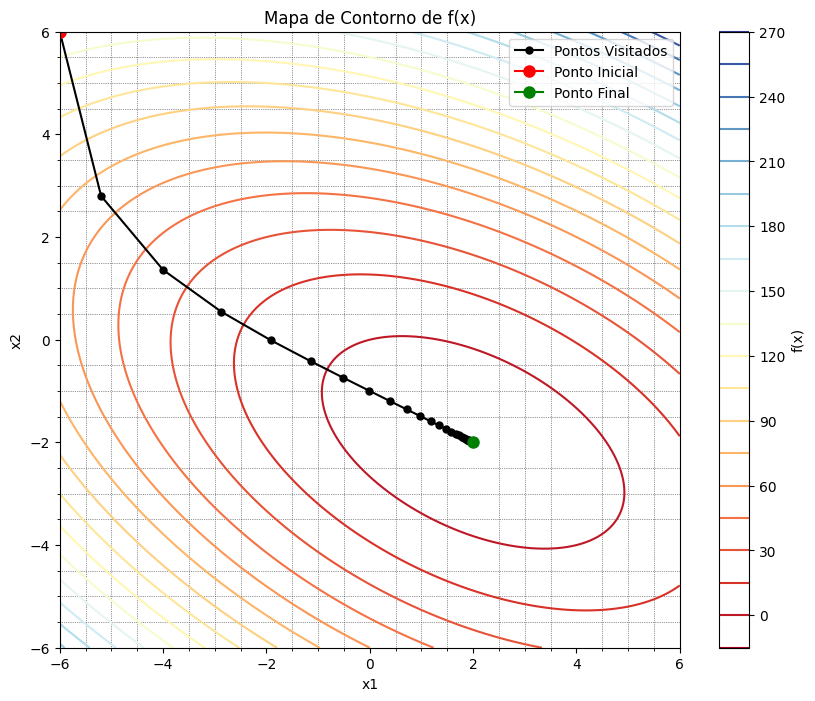

In [32]:
# ALPHA = 0.1


def steepest_descent(A, b, x0, alpha=0.1, tol=1e-6, max_iter=1000):
    x = x0.copy()  # Ponto inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    for i in range(max_iter):
        # Gradiente da função objetivo
        gradient = np.dot(A, x) - b

        # Critério de parada: norma do gradiente
        if np.linalg.norm(gradient) < tol:
            break

        # Atualização do ponto usando o método do gradiente descendente
        x = x - alpha * gradient

        # Armazenando o novo ponto
        x_hist.append(x.copy())

        # Imprimir o número de iterações
    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    r = b - np.dot(A, x)
    print(np.linalg.norm(r))

    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]



# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()


plt.show()

Houve uma melhora, reduzindo a mais de 10x o número de iterações

Novamente:

Número total de iterações: 60
A solução encontrada é :
[ 2.00000005 -1.9999999 ]
A norma L2 do erro é:
7.986910711378093e-07


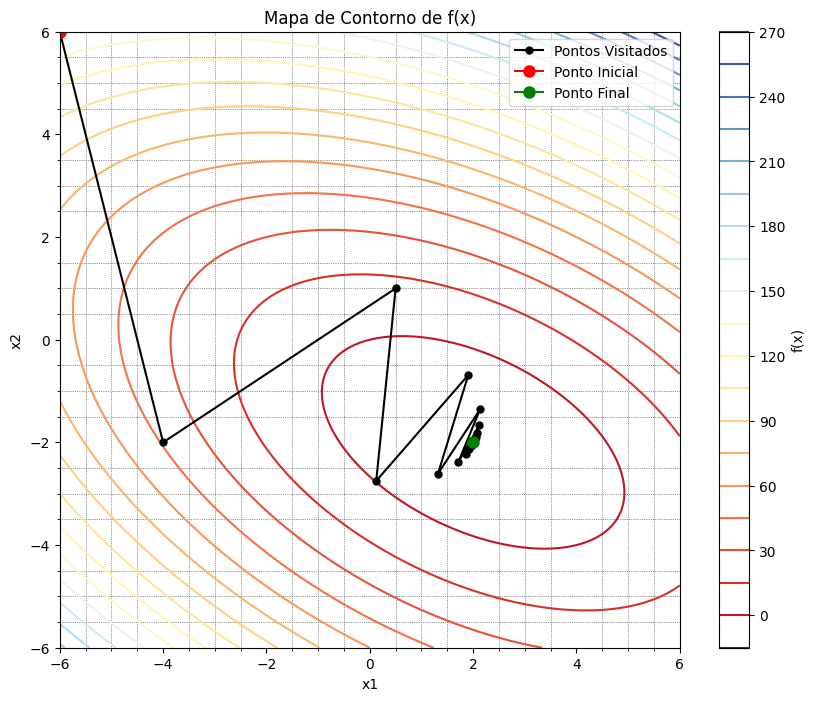

In [35]:
#ALPHA = 0.25

def steepest_descent(A, b, x0, alpha=0.25, tol=1e-6, max_iter=1000):
    x = x0.copy()  # Ponto inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    for i in range(max_iter):
        # Gradiente da função objetivo
        gradient = np.dot(A, x) - b

        # Critério de parada: norma do gradiente
        if np.linalg.norm(gradient) < tol:
            break

        # Atualização do ponto usando o método do gradiente descendente
        x = x - alpha * gradient

        # Armazenando o novo ponto
        x_hist.append(x.copy())

        # Imprimir o número de iterações
    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    r = b - np.dot(A, x)
    print(np.linalg.norm(r))

    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]



# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()


plt.show()

Uma melhora no número de iterações, mas o vcaminho parece estar em zigue-zague. Isto indica que oa iteração avaçou demais, e o solver tentou desviar na iteraçõa seguinte tomando uma direção levemennte oposta fazendo este caminho serrilhado no gráfico. Isto indica uma natureza oscilatória e que se deve evitar.

Mas vamos levar o solver ao limite!

<ipython-input-41-bd1ecad35962>:15: RuntimeWarning: invalid value encountered in subtract
  x = x - alpha * gradient


Número total de iterações: 10000
A solução encontrada é :
[nan nan]
A norma L2 do erro é:
nan


<ipython-input-41-bd1ecad35962>:35: RuntimeWarning: invalid value encountered in scalar subtract
  f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]


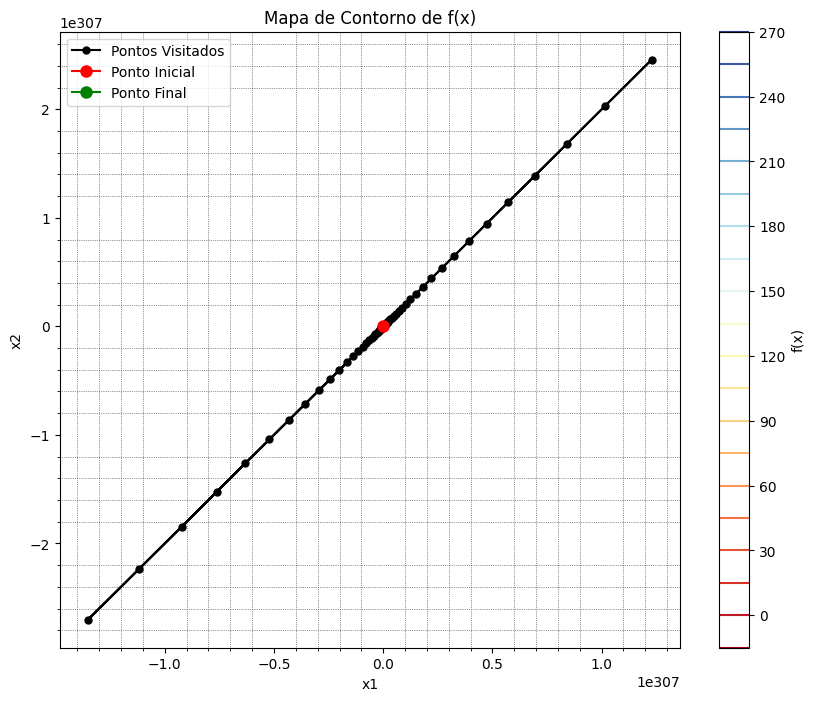

In [41]:
# ALPHA = 0.30

def steepest_descent(A, b, x0, alpha=0.30, tol=1e-6, max_iter=10000):
    x = x0.copy()  # Ponto inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    for i in range(max_iter):
        # Gradiente da função objetivo
        gradient = np.dot(A, x) - b

        # Critério de parada: norma do gradiente
        if np.linalg.norm(gradient) < tol:
            break

        # Atualização do ponto usando o método do gradiente descendente
        x = x - alpha * gradient

        # Armazenando o novo ponto
        x_hist.append(x.copy())

        # Imprimir o número de iterações
    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    r = b - np.dot(A, x)
    print(np.linalg.norm(r))

    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]



# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()


plt.show()

Neste caso, o solver divergiu! E a mudança n o valor de $\alpha$ foi de 0.25 para 0.30. Os valores estão da ordem de $10^{307}$, ou seja, o avanço foi tal que a busca pela solução se comportou como um pêndulo na diagonal do gráfico com uma amplitude enorme, e nem mesmo 10 mil iterações foram capazes de amortecer até uma valor calculável descente.

Logo, o método é sensível a escolha de $\alpha$. O ideal é que ele fosse calculado localmente de acordo com o avanço, de forma dinâmica e em função da distância do ponto atual da solução exata.


Chamemos de $\mathbf{r}$ o vetor que mede a distância entre a Solução $\mathbf{x}^{*}$ e o valor atual de cada iteração $\tilde{\mathbf{x}}$, o que significa que

$\mathbf{r}=\mathbf{A\cdot}\tilde{\mathbf{x}}-\mathbf{b}$, pois $\tilde{\mathbf{x}}$ ainda não é a solução. E quanto maior o seu valor, mais longe se está da solução exata.


UMa forma de acelerar a direção de busca é definir $\alpha$ como:

$\alpha=\frac{\mathbf{r}^{T}\cdot\mathbf{r}}{\mathbf{r}^{T}\cdot\mathbf{A}\cdot\mathbf{r}}$

A dedução desta definição está fora do escopo deste material, mas ela se altera o valor do passo de acordo com o tamanho do vetor de resíduo $r$.

Algoritmo:

1.   Calcular $\mathbf{r}=\mathbf{A\cdot}\tilde{\mathbf{x}}_{0}-\mathbf{b}$.
2.   Calcular $\alpha=\frac{\mathbf{r}^{T}\cdot\mathbf{r}}{\mathbf{r}^{T}\cdot\mathbf{A}\cdot\mathbf{r}}$
3.   Calcular $\mathbf{x}^{k+1} = \mathbf{x}^{k} + \alpha \cdot \mathbf{r}^{k} $
4.  Calcular $\mathbf{r}^{k+1}=\mathbf{r}^{k}+\mathbf{A\cdot}\mathbf{r}^{k}$.
5.   Se $\left\Vert \mathbf{r}^{k+1}\right\Vert < \epsilon$ parar, se não, retorne a 2.

Vejamos ele em ação:


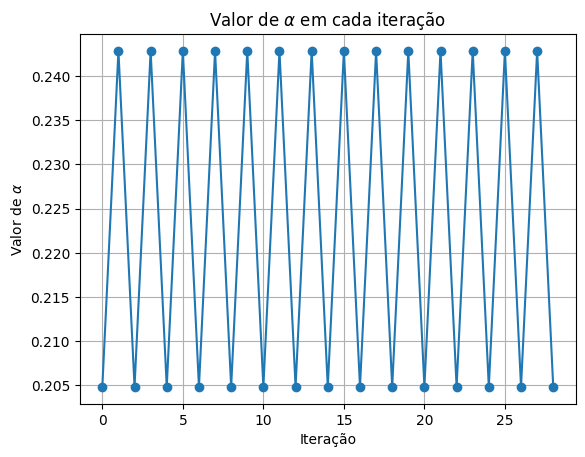

Número total de iterações: 29
A solução encontrada é :
[ 1.99999964 -1.99999992]
A norma L2 do erro é:
9.440607097297656e-07


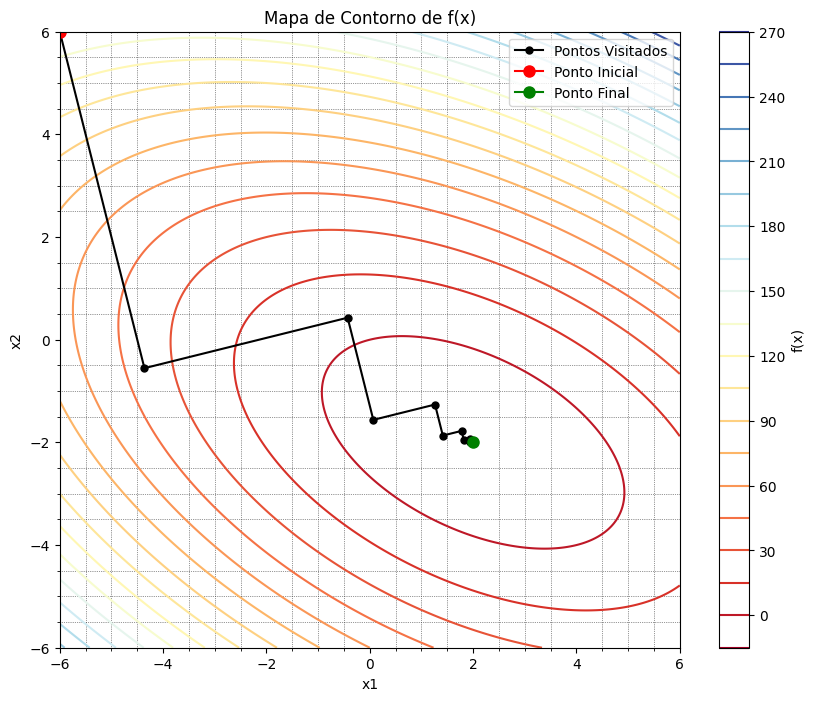

In [64]:
def steepest_descent(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0.copy()  # Ponto inicial
    r = b - np.dot(A, x)  # Resíduo inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    alpha_hist =[]



    for i in range(max_iter):
        # Critério de parada: norma do residuo
        if np.linalg.norm(r) < tol:
            break

        # Calculando o tamanho do passo
        alpha = np.dot(r, r) / np.dot(r, np.dot(A, r))
        alpha_hist.append(alpha.copy())
        # Atualizando o ponto
        x = x + alpha * r

        # Atualizando o residuo
        r = r - alpha * np.dot(A, r)

        # Armazenando o novo ponto
        x_hist.append(x.copy())



        # Imprimir o número de iterações

    # Plotando alpha_hist depois das iterações
    plt.plot(range(len(alpha_hist)), alpha_hist, marker='o')
    plt.xlabel('Iteração')
    plt.ylabel(r'Valor de $\alpha$')
    plt.title(r'Valor de $\alpha$ em cada iteração')
    plt.grid(True)
    plt.show()

    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    print(np.linalg.norm(r))
    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]

# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()

plt.show()



Desta vez obtivemos a solução em 29 iterações sem definir o valor de $\alpha$.
A saída mostra o valor de $\alpha$ oscilando entre  0.20-0.245, e a cada mudança em seu valor, a direção de busca se altera em cerca de 90°.





# Representação Tridimensional

Vejamos como se dá a bsuca pela solução exata sobre a superfície do funcional.

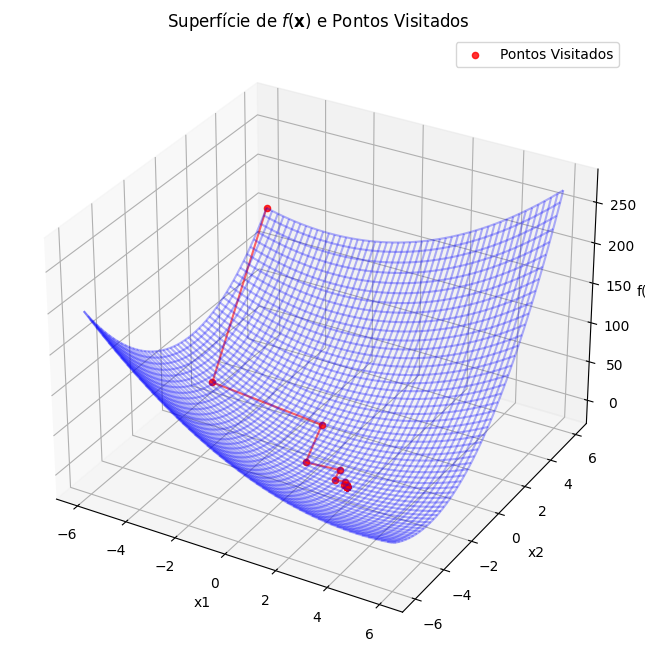

In [65]:
# Plotando a superfície em forma de malha
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot da superfície em forma de malha com transparência
ax.plot_wireframe(X1, X2, F, color='blue', alpha=0.3)

# Plotando os pontos visitados como esferas pequenas e opacas
x_hist_f = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]
ax.scatter(x_hist[:, 0], x_hist[:, 1], x_hist_f, color='red', s=20, alpha=0.8, label='Pontos Visitados', depthshade=False)

# Ligando os pontos visitados por linhas
ax.plot(x_hist[:, 0], x_hist[:, 1], x_hist_f, color='red', alpha=0.6)

# Configurações adicionais
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Superfície de $f(\mathbf{x})$ e Pontos Visitados')
ax.legend()

plt.show()


Observe como as iterações tentam seguir a melhor direção, a mais íngrime. Sem, no entanto, extrapolar. Quando alguma variação na  percebida, $\alpha$ se modifica de modo a reoorientar e escalar adequadamente o avanço.

Esta é a base dos métodos de minimização de gradiente e como se comportam.
Além do Steepest Descent, que é o mais simples e funciona bem para um funcional suave e com um mímino global.
Há variaçòes mais robustas tais como


*   Gradientes Conjugados - CG
*   Gradientes Biconjugados  - Bi-CG
*   Gradiente Conjugado Precondicionado - PCG
*   Método de Residuo Mínimo de Gradiente - GMRes
*   Método do Gradiente Estocástico (Stochastic Gradient Descent - SGD)    

entre outros.